</b> imports and connect to database

In [81]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)

</b> fetch the relevant records from the pums_2017 table

In [82]:
#fething oportunity youth in south king county

skc_OY_db = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
        AND sch = '1'
        AND esr SIMILAR TO '%(3|6)%'
        
''', conn)
skc_OY_db

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
1,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
2,P,2013000128172,9,01,11612,4,53,1061971,118.0,23.0,...,117.0,171.0,181.0,52.0,106.0,143.0,111.0,32.0,94.0,168.0
3,P,2013000155051,9,03,11614,4,53,1061971,2.0,19.0,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0
4,P,2013000166503,9,03,11610,4,53,1061971,41.0,21.0,...,54.0,72.0,37.0,58.0,11.0,11.0,37.0,48.0,45.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,P,2013000067168,9,03,11615,4,53,1061971,22.0,24.0,...,7.0,20.0,24.0,23.0,41.0,7.0,24.0,24.0,33.0,19.0
387,P,2013000070516,9,03,11612,4,53,1061971,20.0,19.0,...,37.0,20.0,15.0,32.0,6.0,14.0,5.0,6.0,16.0,18.0
388,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
389,P,2013000100470,9,04,11613,4,53,1061971,16.0,18.0,...,23.0,3.0,16.0,17.0,11.0,12.0,32.0,29.0,20.0,11.0


In [83]:
#fetching all residents from south king county within the OY age group

skc_allRes_db = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
''', conn)
skc_allRes_db

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000115983,9,03,11614,4,53,1061971,4.0,16.0,...,4.0,2.0,4.0,5.0,6.0,8.0,0.0,1.0,7.0,8.0
1,P,2013000115983,9,06,11614,4,53,1061971,7.0,24.0,...,6.0,2.0,7.0,8.0,15.0,13.0,2.0,1.0,9.0,11.0
2,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
3,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
4,P,2013000121584,9,03,11611,4,53,1061971,18.0,18.0,...,17.0,21.0,32.0,18.0,5.0,11.0,7.0,3.0,30.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
3478,P,2013000106963,9,02,11612,4,53,1061971,43.0,19.0,...,15.0,50.0,43.0,41.0,15.0,28.0,41.0,57.0,53.0,18.0
3479,P,2013000106963,9,03,11612,4,53,1061971,24.0,16.0,...,7.0,25.0,38.0,23.0,7.0,25.0,31.0,19.0,34.0,9.0
3480,P,2013000103566,9,03,11611,4,53,1061971,20.0,17.0,...,37.0,18.0,32.0,4.0,17.0,28.0,40.0,18.0,21.0,19.0


In [84]:
#checking percentage of 16-24 year olds in skc who qualify as OY
#output is: percentage | # of OY in SKC | # of 16-24 year olds in SKC

print((sum(skc_OY_db['pwgtp'])/sum(skc_allRes_db['pwgtp']))*100, sum(skc_OY_db['pwgtp']), sum(skc_allRes_db['pwgtp']))

12.358674009990334 10614.0 85883.0


<b> create two subplots: one for each half of the OY status by age table

In [115]:
#create row and column labels for the total_pop table

age_range_labels = [' test ', '16-18', '19-21', '22-24', 'Totals']
tpop_rows = ['Total Poulation', 'Opportunity Youth', 'Working Without Diploma', 'Not an Opportunity Youth']

#create row and column labels for the opporunity_youth table

oy_rows = ['Oppurtunity Youth', 'No Diploma', 'Highschool Diploma or GED', 'Some College/ No Degree', 'Degree (Associate or Higher)']


In [86]:
#gather totals and percentages from colected data

age_ranges = [(16, 18), (19, 21), (22, 24)]
tpop_data = []
oy_data = []

#store totals for each age group for both tables
tpop_data.append([])
oy_data.append([])
total_tpop = 0
total_oy = 0
age_groupT_dfs = []
age_groupOY_dfs = []
for age_range in age_ranges:
    age_groupT_dfs.append(skc_allRes_db.loc[lambda db: (db['agep'] >= age_range[0]) & (db['agep'] <= age_range[1])])
    age_groupOY_dfs.append(skc_OY_db.loc[lambda db: (db['agep'] >= age_range[0]) & (db['agep'] <= age_range[1])])
for index in range(0, 3):
    tpop_total = age_groupT_dfs[index]['pwgtp'].sum()
    oy_total = age_groupOY_dfs[index]['pwgtp'].sum()
    tpop_data[0].append(['100%', tpop_total])
    total_tpop += tpop_total
    oy_data[0].append(['100%', oy_total])
    total_oy += oy_total
tpop_data[0].append(['100%', total_tpop])
oy_data[0].append(['100%', total_oy])

#fill in the rows for the total_pop table

oy_row = []
wnd_row = []
not_oy_row = []
for index in range(0, 3):
    wnd_mask = ((age_groupT_dfs[index]['esr'] == '1') | (age_groupT_dfs[index]['esr'] == '4')) & ((age_groupT_dfs[index]['schl'] == '14') | (age_groupT_dfs[index]['schl'] == '15'))
    wnd_df = age_groupT_dfs[index].loc[wnd_mask]
    not_oy_df = age_groupT_dfs[index].loc[wnd_mask ^ True]
    oy_row.append([f'{round((oy_data[0][index][1] / tpop_data[0][index][1]) * 100, 1)}%', oy_data[0][index][1]])
    wnd_total = wnd_df['pwgtp'].sum()
    wnd_row.append([f'{round((wnd_total / tpop_data[0][index][1]) * 100, 1)}%', wnd_total])
    not_oy = tpop_data[0][index][1] - oy_row[index][1] - wnd_row[index][1]
    not_oy_row.append([f'{round((not_oy / tpop_data[0][index][1]) * 100, 1)}%', not_oy])
tpop_data.append(oy_row)
tpop_data.append(wnd_row)
tpop_data.append(not_oy_row)


#fill in the totals for total_pop rows
for row in range(1, 4):
    row_total = sum([item[1] for item in tpop_data[row]])
    tpop_data[row].append([f'{round((row_total / tpop_data[0][3][1]) * 100, 1)}%', row_total])
    sum_totals += row_total


#fill in row values and percentages for OY_pop table
no_dip_row = []
dip_row = []
no_deg_row = []
deg_row = []

###relevant schl value description
#
# '15': 12th grade/ no diploma
# '16' & '17': diploma/GED
# '18' & '19': some college but no degree
# '20' -> end: associates degree or better
#
###

for index in range(0, 3):
    col = age_groupOY_dfs[index]
    edu_breakdown = col.groupby(by='schl').sum()['pwgtp']
    no_dip = edu_breakdown.loc[:'15'].sum()
    dip = edu_breakdown.loc['16':'17'].sum()
    no_deg = edu_breakdown.loc['18':'19'].sum()
    deg = edu_breakdown.loc['20':].sum()
    no_dip_row.append([f'{round((no_dip/oy_data[0][index][1]) * 100, 1)}%', no_dip])
    dip_row.append([f'{round((dip/oy_data[0][index][1]) * 100, 1)}%', dip])
    no_deg_row.append([f'{round((no_deg/oy_data[0][index][1]) * 100, 1)}%', no_deg])
    deg_row.append([f'{round((deg/oy_data[0][index][1]) * 100, 1)}%', deg])
oy_data.append(no_dip_row)
oy_data.append(dip_row)
oy_data.append(no_deg_row)
oy_data.append(deg_row)

#fill in totals column

for row in range(1, 5):
    row_total = sum([item[1] for item in oy_data[row]])
    oy_data[row].append([f'{round((row_total / oy_data[0][3][1]) * 100, 1)}%', row_total])
    sum_totals += row_total




In [107]:
#format data into 2d list of strings for entry into tables

tpop_cell_text = []
oy_cell_text = []
for row in tpop_data:
    text_row = [tpop_rows[tpop_data.index(row)]]
    for col in row:
        text_row.append(f'{col[0]}   {int(col[1])}')
    tpop_cell_text.append(text_row)
for row in oy_data:
    text_row = [oy_rows[oy_data.index(row)]]
    for col in row:
        text_row.append(f'{col[0]}   {int(col[1])}')
    oy_cell_text.append(text_row)
oy_cell_text

[['Oppurtunity Youth',
  '100%   1815',
  '100%   3902',
  '100%   4897',
  '100%   10614'],
 ['No Diploma', '50.5%   916', '28.5%   1112', '27.5%   1349', '31.8%   3377'],
 ['Highschool Diploma or GED',
  '43.0%   781',
  '55.8%   2176',
  '43.6%   2135',
  '48.0%   5092'],
 ['Some College/ No Degree',
  '6.5%   118',
  '13.4%   521',
  '20.4%   1000',
  '15.4%   1639'],
 ['Degree (Associate or Higher)',
  '0.0%   0',
  '2.4%   93',
  '8.4%   413',
  '4.8%   506']]

In [114]:
tpop_cell_text

[['Total Poulation',
  '100%   30141',
  '100%   25486',
  '100%   30256',
  '100%   85883'],
 ['Opportunity Youth',
  '6.0%   1815',
  '15.3%   3902',
  '16.2%   4897',
  '12.4%   10614'],
 ['Working Without Diploma',
  '8.8%   2655',
  '4.1%   1045',
  '3.0%   914',
  '5.4%   4614'],
 ['Not an Opportunity Youth',
  '85.2%   25671',
  '80.6%   20539',
  '80.8%   24445',
  '82.3%   70655']]

In [116]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values= age_range_labels, line_color='darkslategray', fill_color = 'lightblue', align='center'),
                                cells=dict(values= tpop_cell_text, line_color='darkslategray', fill_color='lightgray', align='center'))])


fig.show()

AttributeError: 'Table' object has no attribute 'get_xaxis'

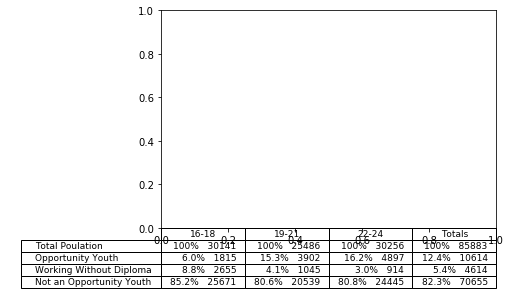

In [79]:
tpop_ax = plt.table(cellText = tpop_cell_text,
                      rowLabels=tpop_rows,
                      colLabels=age_range_labels,
                      loc='bottom', title)
tpop_ax.get_xaxis().set_visible(False)
tpop_ax.get_yaxis().set_visible(False)